From allcools page:https://lhqing.github.io/ALLCools/cell_level/step_by_step/100kb/02-BasicFeatureFiltering.html
Feature Basic Filtering
Purpose¶
Apply basic filters to remove these problematic features:

Extremly low coverage or high coverage features

ENCODE Blcaklist

Some chromosomes (usually, chrY and chrM)



Input
Cell metadata (after basic cell filter)

MCDS files

Output
FeatureList.BasicFilter.txt: List of feature ids passed all filters

In [1]:
cd /share/lasallelab/Ensi/project/allcools/oocytes/

/share/lasallelab/Ensi/project/allcools/oocytes


In [1]:
conda activate /share/lasallelab/Ensi/anaconda3/allcools/

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'repoquery', 'skeleton', 'token', 'repo', 'verify', 'pack', 'server', 'env')

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pathlib
import pandas as pd
import seaborn as sns
from ALLCools.mcds import MCDS
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['savefig.transparent'] = True
matplotlib.rcParams['path.simplify'] = False  # keep exact vectors

In [2]:
sns.set_context(context='notebook', font_scale=1.3)

In [3]:
#parameters 
metadata_path = '../../CellMetadata_PassQC_alloocytes_withyear_mtreads_sub.csv'

# change this to the paths to your MCDS files
mcds_path = '../mcds/chrom100k/'
# Dimension name used to do clustering
obs_dim = 'cell'
var_dim = 'chrom100k'

min_cov = 5000
max_cov = 12000

#chrom_to_remove
exclude_chromosome= ['chrY', 'chrUn', 'Chromosome', 'NW']



In [4]:
# load metadata

metadata = pd.read_csv(metadata_path, index_col=0, sep="\t")
#table = pd.read_csv("allc_table.csv", index_col=0, header=None)
metadata = metadata[metadata["Type"] == "PO"]
total_cells = metadata.shape[0]
print(f'Metadata of {total_cells} cells')
metadata

Metadata of 46 cells


,SampleI,AnimalID,Date,Animdate,Collection,Year,Type.of.sample,WellID,WellBarcode,Type,TotalRead,mCGFrac,Group,SampleName,Path,Bamfile,Total.Reads,Mitochondrial.Reads,MT.Fraction,MT.Percentage
SampleID,,,,,,,,,,,,,,,,,,,,
4146045001PO3NC4G4C,4146045001PO3NC4G4,41460,45001,f2,2,2023,Pooled Oocytes (4) #3,G4,TCGTGCAT,PO,2200000,0.689,Control,4146045001PO3NC4G4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO3_NC4_G4_1_val_1_bismark_bt2_pe....,2535512,8738,NaN,NaN
4129944963PO2NC4M1S,4129944963PO2NC4M1,41299,44963,d2,1,2023,Pooled Oocytes (4) #2,M1,CACGCAAT,PO,2300000,0.684,Stressed,4129944963PO2NC4M1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO2_NC4_M1_1_val_1_bismark_bt2_pe....,2270808,38790,NaN,NaN
4520844650PO1NC5A7S,4520844650PO1NC5A7,45208,44650,n1,1,2022,Pooled Oocytes (5) #1,A7,ATCGTCTC,PO,2400000,0.676,Stressed,4520844650PO1NC5A7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO1_NC5_A7_1_val_1_bismark_bt2_pe....,2821858,11608,NaN,NaN
4146045001PO2NC3F4C,4146045001PO2NC3F4,41460,45001,f2,2,2023,Pooled Oocytes (3) #2,F4,CTGAACGT,PO,2500000,0.686,Control,4146045001PO2NC3F4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41460_45001_PO2_NC3_F4_1_val_1_bismark_bt2_pe....,2635056,48304,NaN,NaN
4520844650PO2NC3B7S,4520844650PO2NC3B7,45208,44650,n1,1,2022,Pooled Oocytes (3) #2,B7,CTCTGGAT,PO,2600000,0.680,Stressed,4520844650PO2NC3B7S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,45208_44650_PO2_NC3_B7_1_val_1_bismark_bt2_pe....,2957798,7806,NaN,NaN
3905345005PO1NC2I1S,3905345005PO1NC2I1,39053,45005,b1,1,2023,Pooled Oocytes (2) #1,I1,TGATAGGC,PO,2700000,0.623,Stressed,3905345005PO1NC2I1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,39053_45005_PO1_NC2_I1_1_val_1_bismark_bt2_pe....,2784702,20544,NaN,NaN
4129944963PO1NC3N1S,4129944963PO1NC3N1,41299,44963,d2,2,2023,Pooled Oocytes (3) #1,N1,ATTCCGCT,PO,2900000,0.626,Stressed,4129944963PO1NC3N1S_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,41299_44963_PO1_NC3_N1_1_val_1_bismark_bt2_pe....,2278410,121886,NaN,NaN
4211144957PO1NC3K4C,4211144957PO1NC3K4,42111,44957,g1,1,2023,Pooled Oocytes (3) #1,K4,ACTGGTGT,PO,3200000,0.674,Control,4211144957PO1NC3K4C_1_val_1_bismark_bt2_pe.all...,/share/lasallelab/Ensi/project/allcools/allc_P...,42111_44957_PO1_NC3_K4_1_val_1_bismark_bt2_pe....,3039304,77312,NaN,NaN
4660644938PO2NC3A10C,4660644938PO2NC3A1,46606,44938,r1,1,2023,Pooled Oocytes (3) #2,A10,GATCTTGC,PO,3600000,0.680,Control,4660644938PO2NC3A10C_1_val_1_bismark_bt2_pe.al...,/share/lasallelab/Ensi/project/allcools/allc_P...,46606_44938_PO2_NC3_A10_1_val_1_bismark_bt2_pe...,3742728,50728,NaN,NaN


In [5]:
mcds = MCDS.open(mcds_path, 
                 var_dim=var_dim, 
                 use_obs=metadata.index)
mcds

<xarray.MCDS>
Dimensions:          (cell: 46, chrom100k: 31764, count_type: 2, mc_type: 3)
Coordinates:
  * cell             (cell) <U20 '4146045001PO3NC4G4C' ... '4123744641PO1NC4N2S'
  * chrom100k        (chrom100k) <U29 'chr1_0' 'chr1_1' ... 'chrY_117'
    chrom100k_chrom  (chrom100k) <U27 'chr1' 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_end    (chrom100k) int64 100000 200000 ... 11700000 11753682
    chrom100k_start  (chrom100k) int64 0 100000 200000 ... 11600000 11700000
  * count_type       (count_type) <U3 'mc' 'cov'
  * mc_type          (mc_type) <U3 'CHN' 'CAN' 'CGN'
Data variables:
    chrom100k_da     (cell, chrom100k, mc_type, count_type) uint32 dask.array<chunksize=(26, 7941, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [6]:
# you can add the cell metadata into MCDS
mcds.add_cell_metadata(metadata)

In [7]:
mcds

<xarray.MCDS>
Dimensions:                   (cell: 46, chrom100k: 31764, count_type: 2,
                               mc_type: 3)
Coordinates: (12/27)
  * cell                      (cell) object '4146045001PO3NC4G4C' ... '412374...
  * chrom100k                 (chrom100k) <U29 'chr1_0' 'chr1_1' ... 'chrY_117'
    chrom100k_chrom           (chrom100k) <U27 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_end             (chrom100k) int64 100000 200000 ... 11753682
    chrom100k_start           (chrom100k) int64 0 100000 ... 11600000 11700000
  * count_type                (count_type) <U3 'mc' 'cov'
    ...                        ...
    cell_Path                 (cell) object '/share/lasallelab/Ensi/project/a...
    cell_Bamfile              (cell) object '41460_45001_PO3_NC4_G4_1_val_1_b...
    cell_Total.Reads          (cell) int64 2535512 2270808 ... 48057090 53342612
    cell_Mitochondrial.Reads  (cell) int64 8738 38790 11608 ... 18402 130092
    cell_MT.Fraction          (cell) float64 nan nan nan nan ... nan nan nan nan
    cell_MT.Percentage        (cell) float64 nan nan nan nan ... nan nan nan nan
Data variables:
    chrom100k_da              (cell, chrom100k, mc_type, count_type) uint32 dask.array<chunksize=(26, 7941, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [22]:
total_feature = mcds.get_index(var_dim).size
total_feature

31764

Feature chrom100k mean cov across cells added in MCDS.coords['chrom100k_cov_mean'].


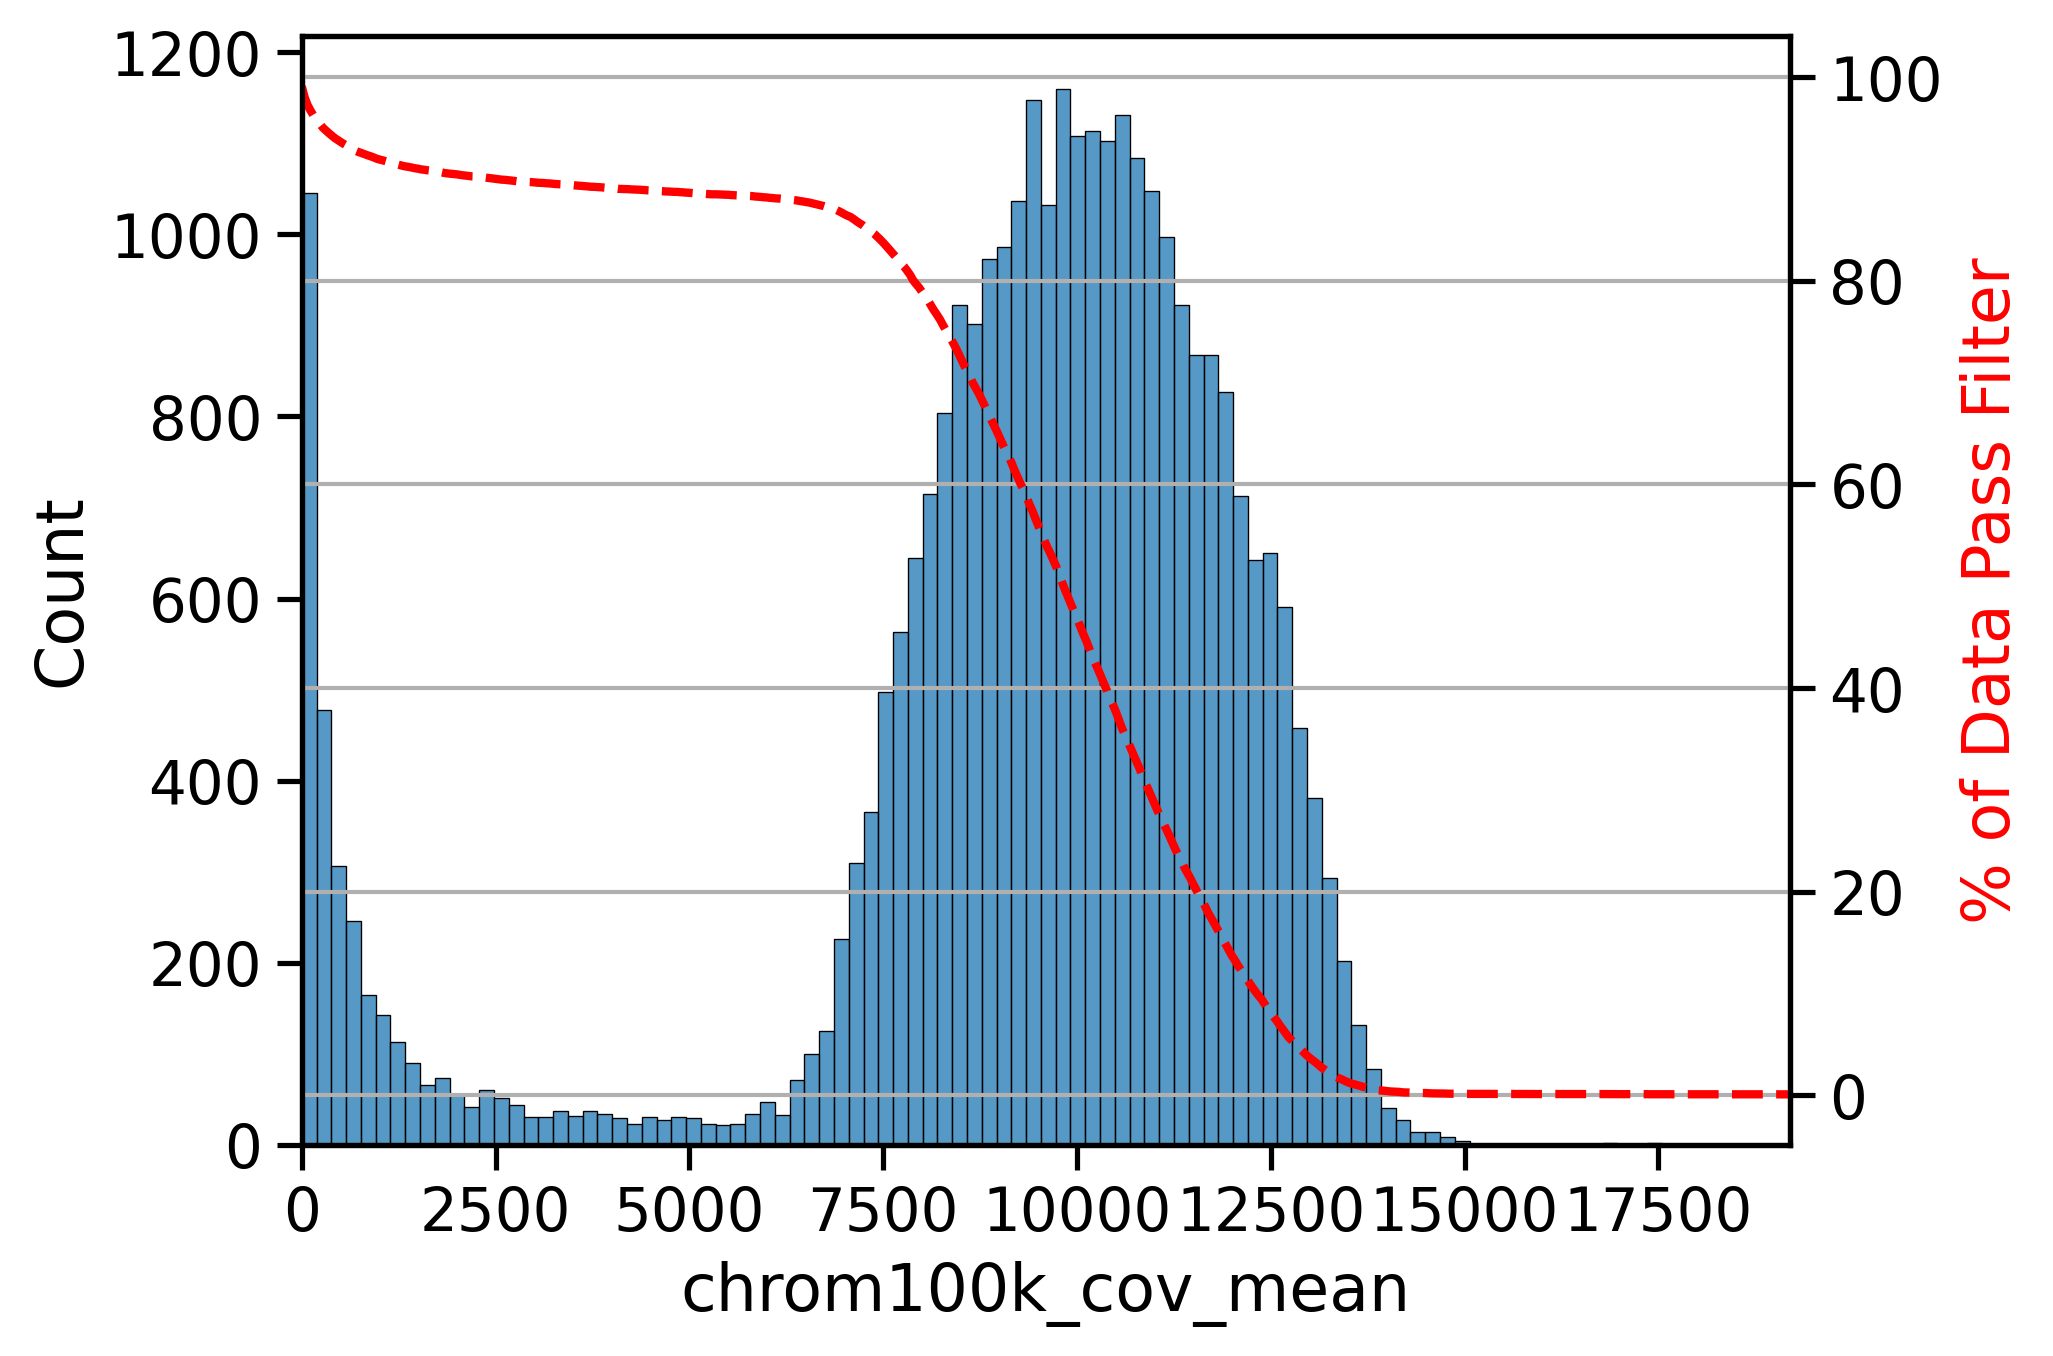

In [8]:
# Assuming mcds is your object and add_feature_cov_mean() generates a plot
mcds.add_feature_cov_mean(var_dim=var_dim)

# Save the plot to a file
#plt.savefig('05b_mcds100kb_featurecoverage.png', dpi=300, bbox_inches='tight')
plt.savefig('panela-2_sf1_.pdf', dpi=300, bbox_inches='tight')

In [27]:
mcds


<xarray.MCDS>
Dimensions:                   (cell: 46, chrom100k: 31764, count_type: 2,
                               mc_type: 3)
Coordinates: (12/28)
  * cell                      (cell) object '4146045001PO3NC4G4C' ... '412374...
  * chrom100k                 (chrom100k) object 'chr1_0' ... 'chrY_117'
    chrom100k_chrom           (chrom100k) <U27 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_end             (chrom100k) int64 100000 200000 ... 11753682
    chrom100k_start           (chrom100k) int64 0 100000 ... 11600000 11700000
  * count_type                (count_type) <U3 'mc' 'cov'
    ...                        ...
    cell_Bamfile              (cell) object '41460_45001_PO3_NC4_G4_1_val_1_b...
    cell_Total.Reads          (cell) int64 2535512 2270808 ... 48057090 53342612
    cell_Mitochondrial.Reads  (cell) int64 8738 38790 11608 ... 18402 130092
    cell_MT.Fraction          (cell) float64 nan nan nan nan ... nan nan nan nan
    cell_MT.Percentage        (cell) float64 nan nan nan nan ... nan nan nan nan
    chrom100k_cov_mean        (chrom100k) float64 1.043e+04 1.254e+04 ... 0.0
Data variables:
    chrom100k_da              (cell, chrom100k, mc_type, count_type) uint32 dask.array<chunksize=(26, 7941, 1, 1), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  chrom100k

In [28]:
chrom100k_dim_labels = mcds['chrom100k_cov_mean'].values
print(chrom100k_dim_labels)


[10430.58695652 12542.         11370.39130435 ...     0.
     0.             0.        ]


In [29]:
# Align chrom100k_cov_mean with chrom100k by creating it as a data variable
mcds = mcds.assign(chrom100k_cov_mean=("chrom100k", mcds["chrom100k_cov_mean"].values))
# Apply the filter on chrom100k based on chrom100k_cov_mean
cov_filter = (mcds["chrom100k_cov_mean"] > min_cov) & (mcds["chrom100k_cov_mean"] < max_cov)
mcds_filtered = mcds.sel(chrom100k=cov_filter)
mcds = mcds_filtered

In [30]:

mcds = mcds.filter_feature_by_cov_mean(
     var_dim="chrom100k",
    min_cov=min_cov,  # minimum coverage
    max_cov=max_cov  # Maximum coverage
)

Before cov mean filter: 23803 chrom100k
 After cov mean filter: 23803 chrom100k 100.0%


In [31]:
print(mcds["chrom100k_cov_mean"])


<xarray.DataArray 'chrom100k_cov_mean' (chrom100k: 23803)>
array([10430.58695652, 11370.39130435,  6428.84782609, ...,
        9454.41304348, 10316.82608696,  9485.41304348])
Coordinates:
  * chrom100k           (chrom100k) object 'chr1_0' ... 'chrX_NW_021160383v1_...
    chrom100k_chrom     (chrom100k) <U27 'chr1' ... 'chrX_NW_021160383v1_random'
    chrom100k_end       (chrom100k) int64 100000 300000 ... 153300000 68997
    chrom100k_start     (chrom100k) int64 0 200000 300000 ... 153200000 0
    chrom100k_cov_mean  (chrom100k) float64 1.043e+04 1.137e+04 ... 9.485e+03


In [32]:
mcds = mcds.remove_chromosome(exclude_chromosome)

0 chrom100k features in ['chrY', 'chrUn', 'Chromosome', 'NW'] removed.


In [33]:
print(
    f'{mcds.get_index(var_dim).size} ({mcds.get_index(var_dim).size * 100 / total_feature:.1f}%) '
    f'{var_dim} remained after all the basic filter.')

23803 (74.9%) chrom100k remained after all the basic filter.


In [34]:
with open('FeatureList.BasicFilter.txt', 'w') as f:
    for var in mcds.get_index(var_dim).astype(str):
        f.write(var + '\n')